
# Introduction to Business Analytics
## Internal Assessment - Group Project

In this notebook, we will:
- Load the UCI crime dataset
- Clean the data
- Perform exploratory data analysis (EDA)
- Conduct linear regression
- Perform logistic regression (if required)
  
Aim:
- To understand significant contributors to the crime rate
- To predict crime rate of a region based on certain features

In [1]:
# Importing Required Libraries & Modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.api import qqplot

import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Load Datatset

In [2]:
from tkinter import filedialog as fd
path = fd.askopenfilename(title='Select File')
df = pd.read_csv(path)
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB



## Data Cleaning
- Handle missing values
- Remove columns with too many missing values
- Standardize the data for regression analysis


In [4]:
missing = df.isnull().mean() * 100
data = df.loc[:, missing < 10]
data = data.dropna().reset_index(drop=True)

print(f"Data cleaned. New shape: {data.shape}")
data

Data cleaned. New shape: (1993, 104)


,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0

In [5]:
# Label Encoding
data[data.select_dtypes(exclude='number').columns] = (
    data.select_dtypes(exclude='number')
    .apply(lambda x: x.astype('category').cat.codes)
)

In [6]:
# Correlation analysis
corrs = data.corr()
imp_corrs = corrs['ViolentCrimesPerPop'].drop('ViolentCrimesPerPop')
threshold = 0.56

# Identify significant correlations
significant_features = imp_corrs[abs(imp_corrs) > threshold].index.tolist()
print("Significant features: ",*significant_features)

Significant features:  racepctblack racePctWhite pctWInvInc pctWPubAsst PctFam2Par PctKids2Par PctYoungKids2Par PctTeen2Par PctIlleg


In [7]:
# Only significant features and the target
data = data[significant_features + ['ViolentCrimesPerPop']]
data.head()

,racepctblack,racePctWhite,pctWInvInc,pctWPubAsst,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctIlleg,ViolentCrimesPerPop
0,0.02,0.90,0.60,0.15,0.55,0.59,0.61,0.56,0.14,0.20
1,0.12,0.74,0.45,0.29,0.43,0.47,0.60,0.39,0.24,0.67
2,0.49,0.56,0.39,0.40,0.42,0.44,0.43,0.43,0.46,0.43
3,1.00,0.08,0.43,0.20,0.65,0.54,0.83,0.65,0.33,0.12
4,0.02,0.95,0.68,0.11,0.91,0.91,0.89,0.85,0.06,0.03


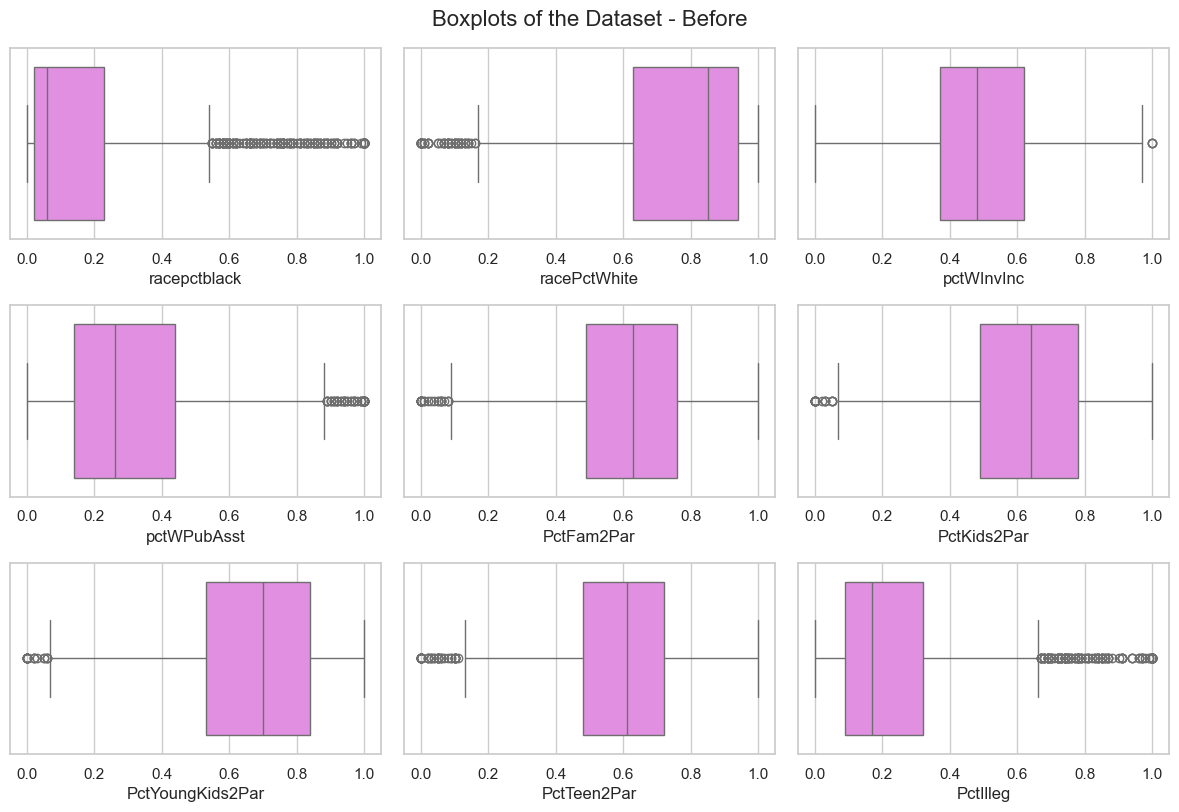

In [8]:
# Boxplot for each numerical feature
plt.figure(figsize=(12, 10))
for i, feature in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 3, i)  # 3 rows, 4 columns of subplots
    sns.boxplot(x=data[feature], color="violet")
plt.tight_layout()
plt.suptitle('Boxplots of the Dataset - Before', fontsize=16, y=1.02);

In [9]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    Removes outliers from numerical columns using the IQR method.

    Outliers are defined as values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR],
    where Q1 is the 25th percentile and Q3 is the 75th percentile.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    cleanDF = df.copy()

    for column in cleanDF.select_dtypes(include=['number']).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = cleanDF[column].quantile(0.25)
        Q3 = cleanDF[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lo = Q1 - 1.5 * IQR
        high = Q3 + 1.5 * IQR

        # Filter out the outliers
        cleanDF = cleanDF[(cleanDF[column] >= lo) & (cleanDF[column] <= high)]

    return cleanDF

In [10]:
sample = remove_outliers(data).reset_index(drop=True)

In [11]:
def plot_boxplots(sample):
    plt.figure(figsize=(12, 10))
    for i, feature in enumerate(sample.columns[:-1], 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x=sample[feature], color="violet")
    plt.tight_layout()
    plt.suptitle('Boxplots of the Dataset - After', fontsize=16, y=1.02)
    plt.show()

# Input for number of iterations
iterations = int(input("Enter the number of iterations: "))

for _ in range(iterations):
    sample = remove_outliers(sample).reset_index(drop=True)
    plot_boxplots(sample)

Enter the number of iterations:  0


In [12]:
rename_columns = {
    'racepctblack': 'PercentBlack',
    'racePctWhite': 'PercentWhite',
    'pctWInvInc': 'PercentWealthy',
    'pctWPubAsst': 'PercentPublicAssist',
    'PctFam2Par': 'PercentTwoParentFam',
    'PctKids2Par': 'PercentKidsTwoParent',
    'PctYoungKids2Par': 'PercentYoungKidsTwoParent',
    'PctTeen2Par': 'PercentTeensTwoParent',
    'PctIlleg': 'PercentSingleParent',
    'ViolentCrimesPerPop': 'ViolentCrimeRate'
}

# Renaming columns in the DataFrame
sample = sample.rename(columns=rename_columns)

| Symbol  | Variable Name              | Description                                                             | Scale         | Type of Measurement     |
|---------|----------------------------|-------------------------------------------------------------------------|---------------|--------------------------|
| x_1     | `PercentBlack`            | Percentage of the population identifying as Black or African American   | Ratio (%)     | Quantitative (Continuous) |
| x_2     | `PercentWhite`            | Percentage of the population identifying as White                       | Ratio (%)     | Quantitative (Continuous) |
| x_3     | `PercentWealthy`          | Percentage of households with annual incomes above $75,000             | Ratio (%)     | Quantitative (Continuous) |
| x_4     | `PercentPublicAssist`     | Percentage of households receiving public assistance                    | Ratio (%)     | Quantitative (Continuous) |
| x_5     | `PercentTwoParentFam`     | Percentage of families with two parents present                         | Ratio (%)     | Quantitative (Continuous) |
| x_6     | `PercentKidsTwoParent`    | Percentage of children living in two-parent households                  | Ratio (%)     | Quantitative (Continuous) |
| x_7     | `PercentYoungKidsTwoParent` | Percentage of young children (0–5 years) living in two-parent households | Ratio (%)     | Quantitative (Continuous) |
| x_8     | `PercentTeensTwoParent`   | Percentage of teenagers living in two-parent households                 | Ratio (%)     | Quantitative (Continuous) |
| x_9     | `PercentSingleParent`     | Percentage of births to single parents                                  | Ratio (%)     | Quantitative (Continuous) |
| x_10    | `ViolentCrimeRate`        | Rate of violent crimes per capita                                       | Ratio (0–N crimes) | Quantitative (Continuous) |

In [13]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PercentBlack               1465 non-null   float64
 1   PercentWhite               1465 non-null   float64
 2   PercentWealthy             1465 non-null   float64
 3   PercentPublicAssist        1465 non-null   float64
 4   PercentTwoParentFam        1465 non-null   float64
 5   PercentKidsTwoParent       1465 non-null   float64
 6   PercentYoungKidsTwoParent  1465 non-null   float64
 7   PercentTeensTwoParent      1465 non-null   float64
 8   PercentSingleParent        1465 non-null   float64
 9   ViolentCrimeRate           1465 non-null   float64
dtypes: float64(10)
memory usage: 114.6 KB


In [14]:
features = ['PercentBlack', 'PercentWhite', 'PercentWealthy', 
			'PercentPublicAssist','PercentTwoParentFam', 
			'PercentKidsTwoParent', 'PercentYoungKidsTwoParent',
			'PercentTeensTwoParent', 'PercentSingleParent']
target = 'ViolentCrimeRate'

## Exploratory Data Analysis and Feature Engineering
- Visualize distributions
- Examine correlations
- Identify potential relationships

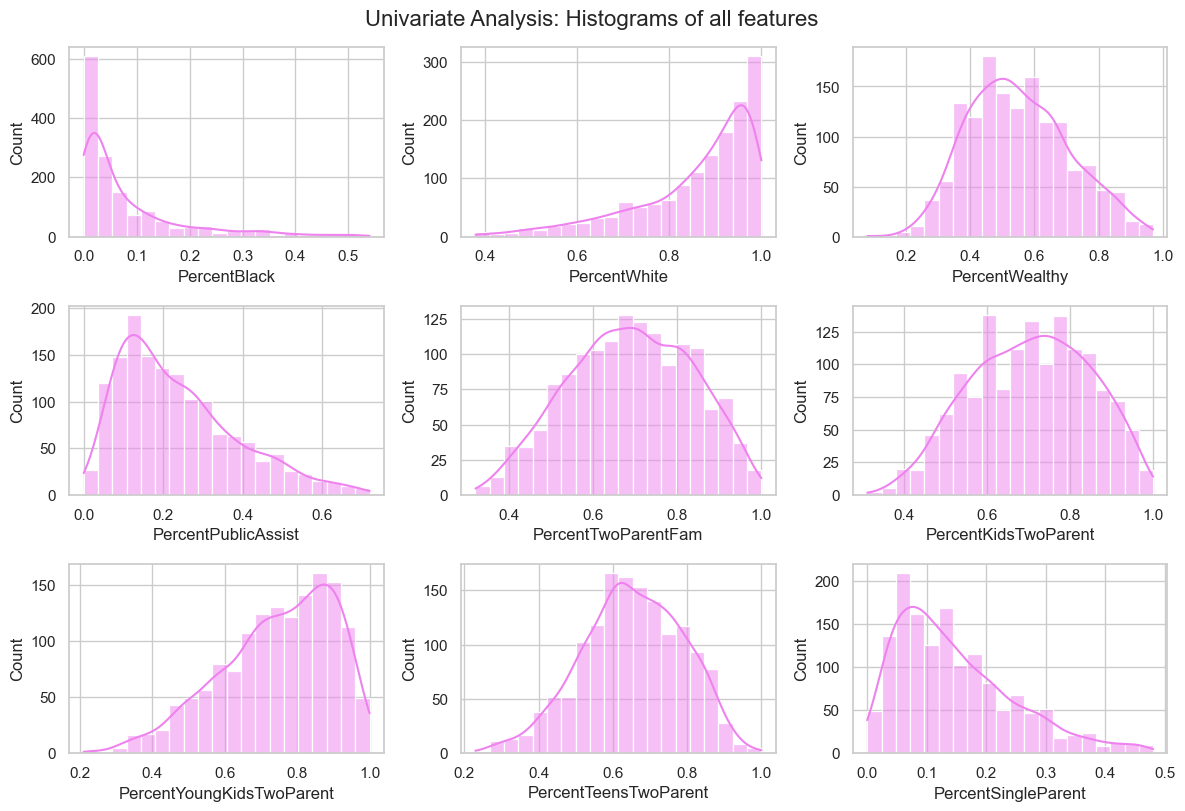

In [15]:
# Plot histograms for each feature
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    sns.histplot(sample[feature], 
				 kde=True, 
				 color="violet", 
				 bins=20)
plt.tight_layout()

plt.suptitle('Univariate Analysis: Histograms of all features', fontsize=16, y=1.02);

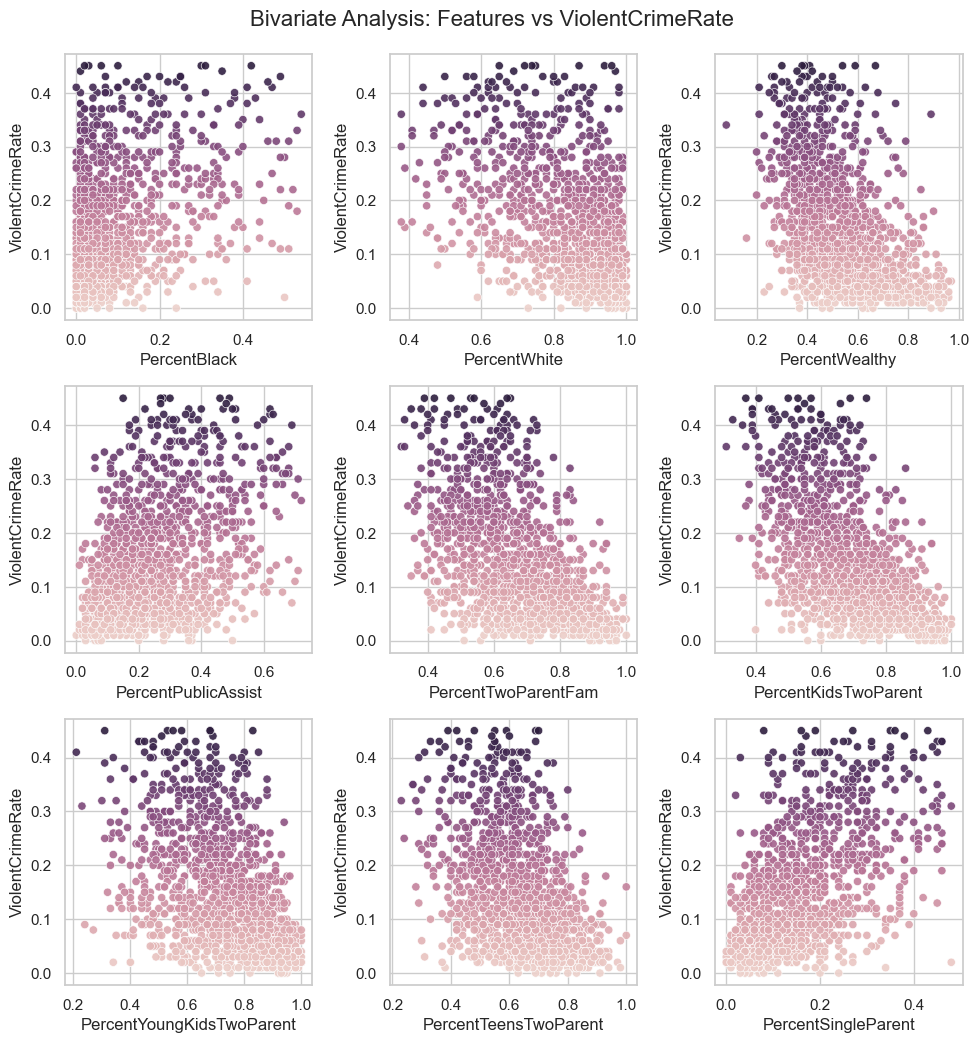

In [16]:
# Scatterplot for each feature against ViolentCrimeRate
plt.figure(figsize=(10, 13))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    sns.scatterplot(x=sample[feature], 
					y=sample['ViolentCrimeRate'],alpha=0.9,
					hue=sample['ViolentCrimeRate'], legend=False)
plt.tight_layout()
plt.suptitle('Bivariate Analysis: Features vs ViolentCrimeRate', fontsize=16, y=1.02);

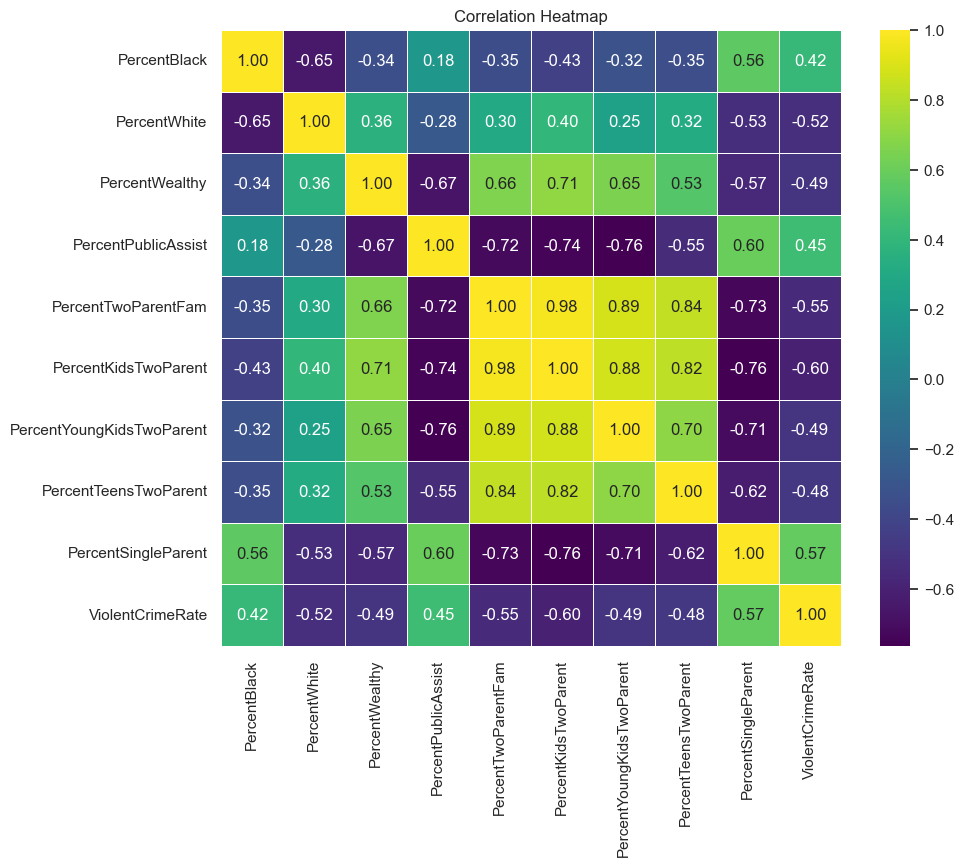

In [17]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sample.corr(), 
			annot=True, 
			cmap="viridis", 
			fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap');


## Linear Regression
- Scale the Dataset
- Split the Dataset into features and target
- Train and Test Split
- Evaluate the Model
- Test Assumptions
  
We will predict violent crimes per population using the other features.


In [18]:
# Scaling the data
scaler = StandardScaler()
scaled = scaler.fit_transform(sample)

scaled = pd.DataFrame(scaled, columns=sample.columns)

In [19]:
# Splitting the Dataset into Features and Target
X = sm.add_constant(scaled.drop(columns=[target]))
y = scaled[target]

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, 
													y, 
													test_size=0.2, 
													random_state=42)


# Train the model
lr = sm.OLS(y_train,X_train).fit(cov_type='HC3')
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       ViolentCrimeRate   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          2.15e-163
Time:                        02:18:58   Log-Likelihood:                -1291.6
No. Observations:                1172   AIC:                             2603.
Df Residuals:                    1162   BIC:                             2654.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0046      0.022      0.212      0.832      -0.038       0.047
PercentBlack                 -0.0441      0.037     -1.186      0.235      -0.117       0.029
PercentWhite                 -0.2753      0.033     -8.274      0.000      -0.340      -0.210
PercentWealthy               -0.0803      0.032     -2.489      0.013      -0.144      -0.017
PercentPublicAssist          -0.0288      0.041     -0.699      0.484      -0.110       0.052
PercentTwoParentFam           0.2950      0.130      2.263      0.024       0.039       0.551
PercentKidsTwoParent         -0.7003      0.140     -5.017      0.000      -0.974      -0.427
PercentYoungKidsTwoParent     0.0522      0.060      0.876      0.381      -0.065       0.169
PercentTeensTwoParent        -0.0114      0.041     -0.282      0.778      -0.091       0.068
PercentSingleParent           0.1342      0.045      2.960      0.003       0.045       0.223
==============================================================================
Omnibus:                      145.607   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.081
Skew:                           0.808   Prob(JB):                     1.83e-55
Kurtosis:                       4.596   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [21]:
# Evaluating the Model
y_pred = lr.predict(X_test)
y_pred4train = lr.predict(X_train)

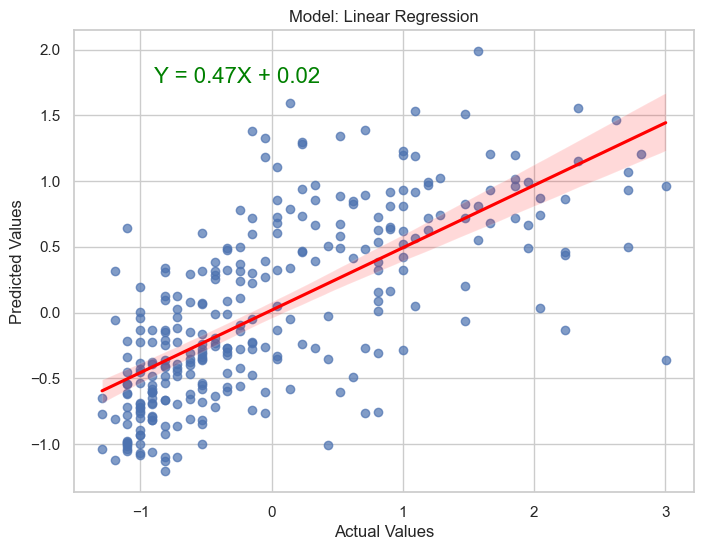

In [22]:
plt.figure(figsize=(8, 6))

sns.regplot(x=y_test, 
			y=y_pred, 
			scatter_kws={'alpha': 0.7}, 
			line_kws={'color': 'red'}, 
			fit_reg=True)


# Model Eqn
slope, intercept = np.polyfit(y_test, y_pred, 1)
equation = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.text(0.13, 0.9, equation, 
		 horizontalalignment='left', verticalalignment='center', 
		 transform=plt.gca().transAxes, fontsize=16, color='Green')

plt.title('Model: Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

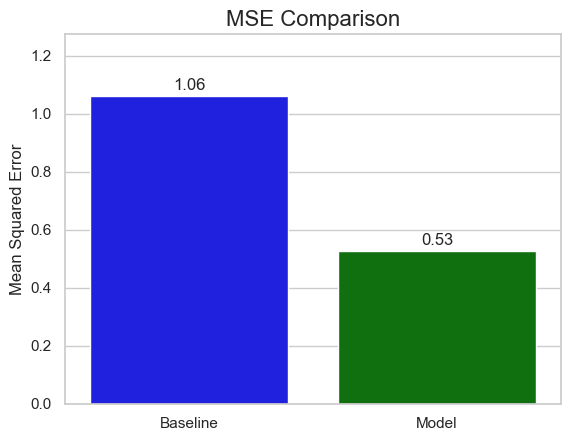

In [23]:
# Compute baseline MSE using the median of y_train
baseline_predictions = [y_train.median()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_predictions)

# Compute the model's MSE
model_mse = mean_squared_error(y_test, y_pred)

# Prepare data for visualization
mse_values = [baseline_mse, model_mse]
labels = ['Baseline', 'Model']

# Plot with Seaborn
sns.barplot(x=labels, y=mse_values, palette=['blue', 'green'])

# Add values above the bars
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.02 * max(mse_values), f'{value:.2f}', ha='center', fontsize=12)

# Customize plot
plt.title('MSE Comparison', fontsize=16)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylim(0, max(mse_values) * 1.2);

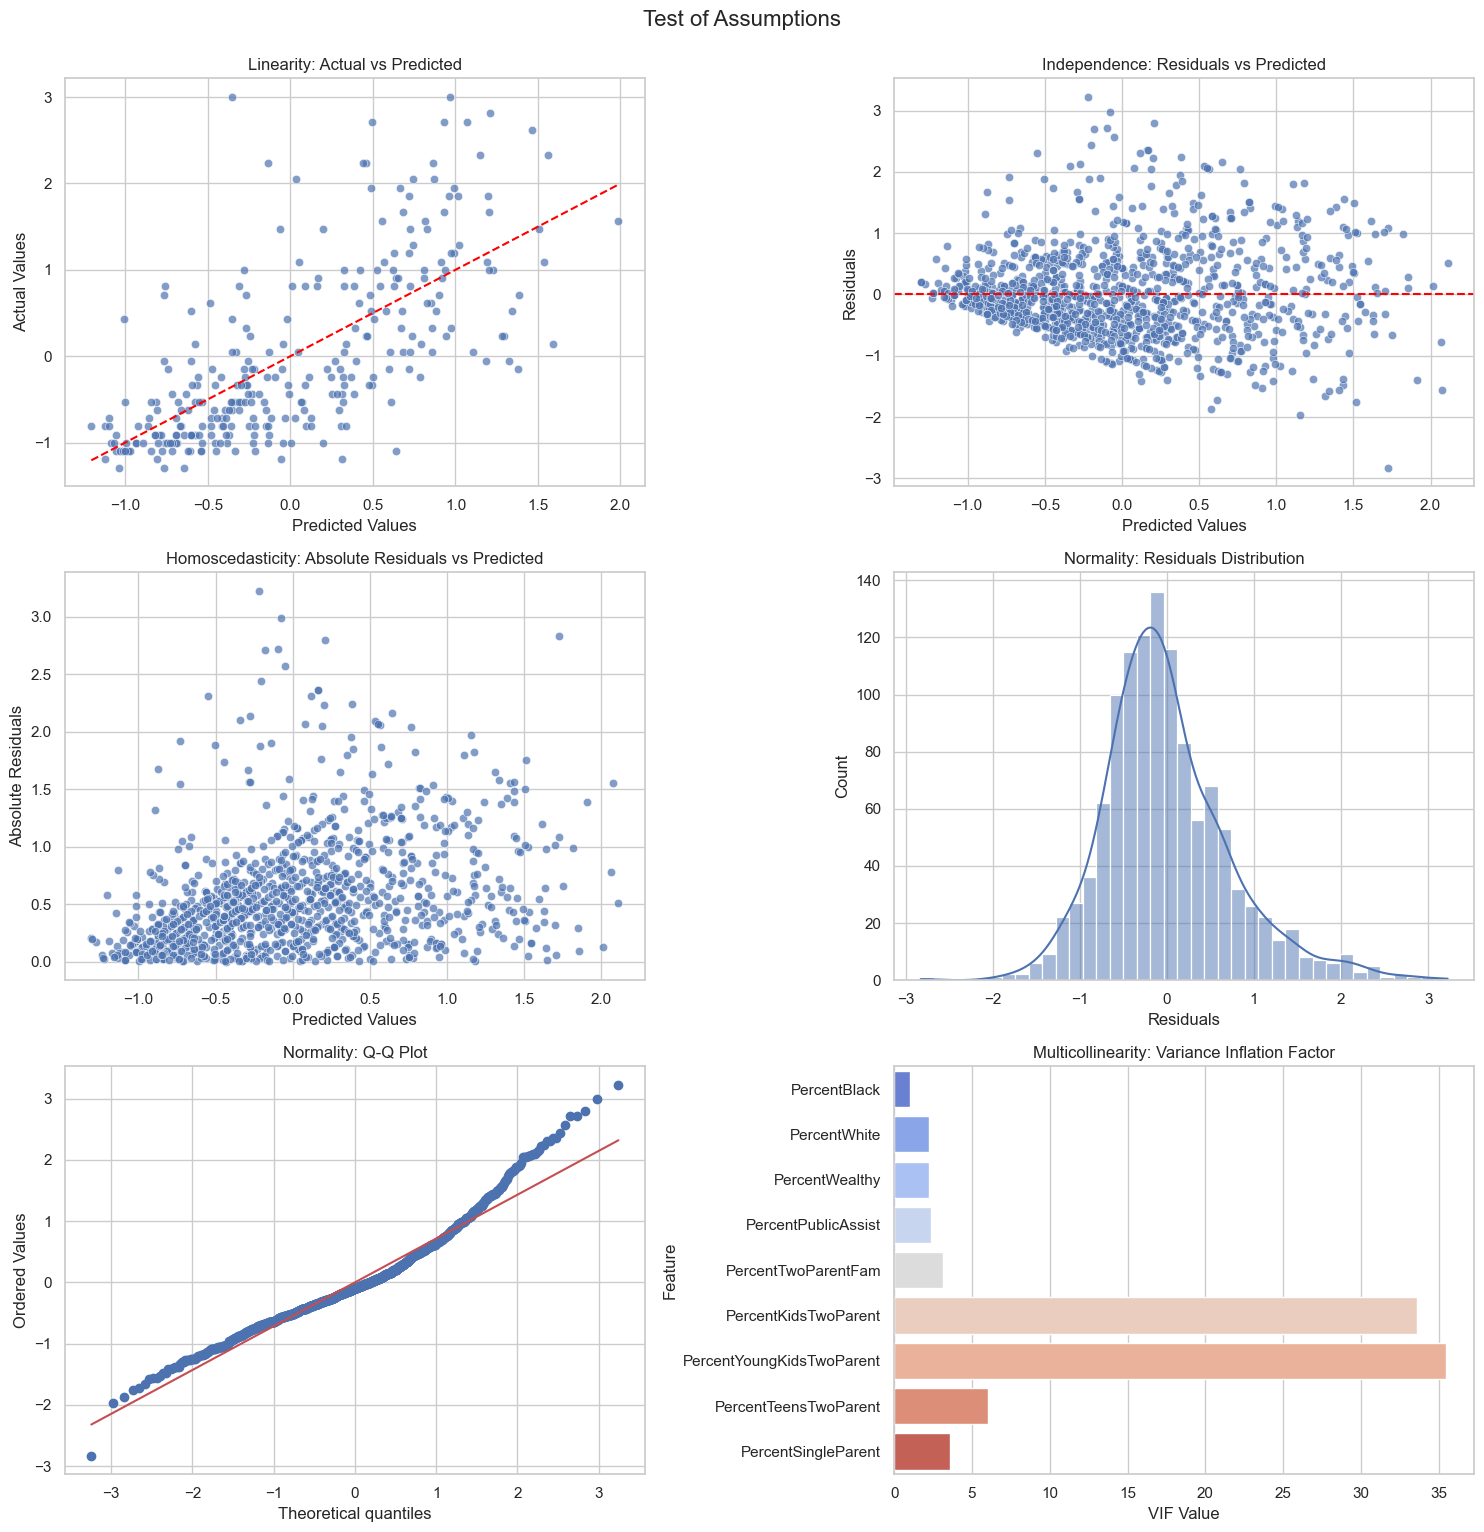

In [24]:
from scipy.stats import shapiro, probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

residuals = lr.resid

# Create subplots for assumption tests
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

# 1. Linearity
sns.scatterplot(x=y_pred, y=y_test, ax=axs[0], alpha=0.7)
axs[0].plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 
			color='red', linestyle='--')
axs[0].set_title('Linearity: Actual vs Predicted')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Actual Values')

# 2. Residual Independence
sns.scatterplot(x=y_pred4train, y=residuals, ax=axs[1], alpha=0.7)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Independence: Residuals vs Predicted')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# 3. Homoscedasticity
sns.scatterplot(x=y_pred4train, y=np.abs(residuals), ax=axs[2], alpha=0.7)
axs[2].set_title('Homoscedasticity: Absolute Residuals vs Predicted')
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Absolute Residuals')

# 4. Normality of Errors (Histogram & Q-Q Plot)
sns.histplot(residuals, kde=True, ax=axs[3])
axs[3].set_title('Normality: Residuals Distribution')
axs[3].set_xlabel('Residuals')

probplot(residuals, dist="norm", plot=axs[4])
axs[4].set_title('Normality: Q-Q Plot')

# 5. Multicollinearity (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns[1:]
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]-1)]

sns.barplot(x='VIF', y='Feature', data=vif_data, ax=axs[5], palette='coolwarm')
axs[5].set_title('Multicollinearity: Variance Inflation Factor')
axs[5].set_xlabel('VIF Value')

plt.tight_layout()
plt.suptitle('Test of Assumptions', fontsize=16, y=1.02);

**Notable Violations of Assumptions**:

**Heteroscedasticity**:  
The residuals scatter plot against the predicted values, as well as the absolute residuals plot, indicate that the variance of the residuals is not constant. This violates the assumption of homoscedasticity, which can result in inefficient estimates and biased standard errors.  

 **Multicollinearity**:  
The Variance Inflation Factor (VIF) analysis reveals that some features have elevated VIF values, but these remain below the critical threshold of 10. This suggests minor multicollinearity, which may slightly reduce the model's interpretability but is unlikely to significantly impact the coefficients or predictions.

**Due to the identified issues, particularly heteroscedasticity, we am attempting logistic regression as an alternative approach to better suit the data and modeling goals.**


## Logistic Regression
 - Scale the Dataset
 - Convert the target variable into categories (high risk/low risk)
 - Split into features and target
 - Train and Evaluate Model
 - Visualise Model Decision Boundary


In [25]:
# Scaling the data
scaler = StandardScaler()
scaled4log = scaler.fit_transform(sample)

scaled4log = pd.DataFrame(scaled4log, columns=sample.columns)

In [26]:
# Prepare Data for Logistic Regression

median_val = scaled4log[target].median()

scaled4log['RiskCategory'] = (scaled4log[target] > median_val).astype(int)

scaled4log['RiskCategory'] = scaled4log['RiskCategory'].replace(
	{0:'Low Risk',
	1: 'High Risk'}
)

In [27]:
X4log = scaled4log.drop(columns=[target, 'RiskCategory'])
X4log = sm.add_constant(X4log)
y4log = scaled4log['RiskCategory'].astype('category').cat.codes

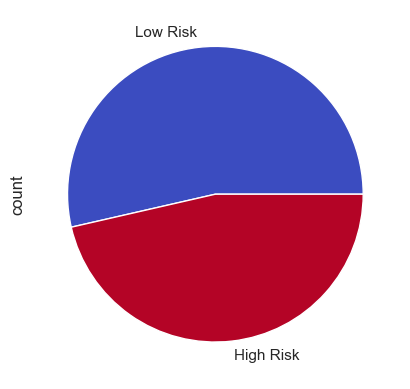

In [28]:
y4log.value_counts().plot(kind='pie',
						  cmap='coolwarm',
						 labels=['Low Risk','High Risk']);

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X4log, 
													y4log, 
													test_size=0.2, 
													random_state=42)

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Predictions and evaluation
y_pred = log_reg.predict(X_test)

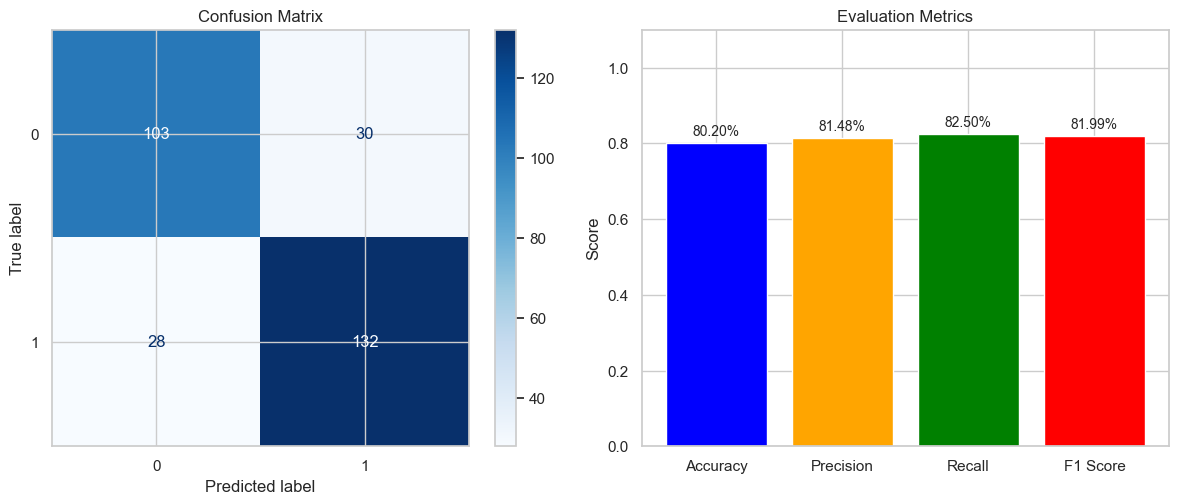

In [31]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# metrics
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix
disp.plot(cmap="Blues", ax=ax[0])
ax[0].set_title("Confusion Matrix")

# Bar chart
ax[1].bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
for i, value in enumerate(values):
    ax[1].text(i, value + 0.02, f"{value:.2%}", ha='center', fontsize=10)
ax[1].set_ylim(0, 1.1)
ax[1].set_title("Evaluation Metrics")
ax[1].set_ylabel("Score")

plt.tight_layout();

**Visualisations**

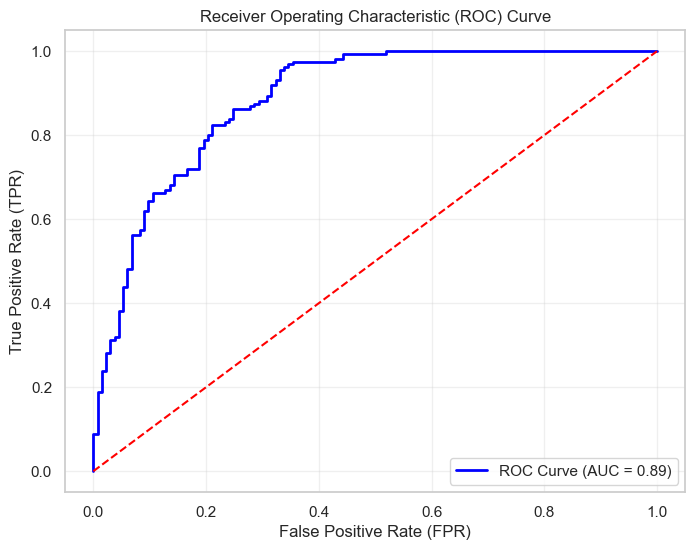

In [32]:
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", 
		 color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [33]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Mesh Grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = log_reg.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)


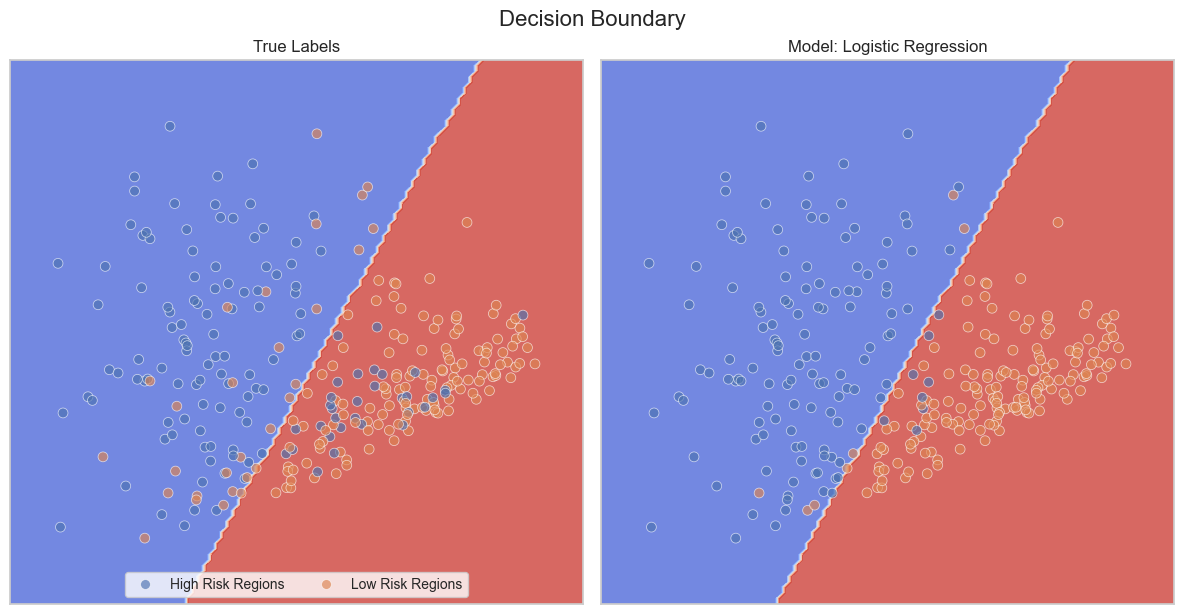

In [34]:
def plot_decision_boundary(xx, yy, Z, X_pca, labels, title, legend_labels=None):
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    scatter = sns.scatterplot(
        x=X_pca[:, 0], 
		y=X_pca[:, 1], 
		hue=labels, 
		palette="deep", s=50, alpha=0.65,
		edgecolor= 'w'
    )
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    if legend_labels:  # Sync legend if labels are provided
        handles, _ = scatter.get_legend_handles_labels()
        plt.legend(handles, legend_labels, loc='lower center', ncol=2, fontsize=10)
    else:
        plt.legend([], [], frameon=False)  # Remove legend if no labels provided

# Plot decision boundaries
plt.figure(figsize=(12, 6))

for i, (labels, title) in enumerate(
    [(y_test, 'True Labels'), (y_pred, 'Model: Logistic Regression')]
):
    plt.subplot(1, 2, i + 1)
    plot_decision_boundary(
        xx, yy, Z, X_pca, labels, title, legend_labels=['High Risk Regions', 'Low Risk Regions'] if i == 0 else None
    )

plt.tight_layout()
plt.suptitle('Decision Boundary', fontsize=16, y=1.02);
